In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colabs = pd.read_csv('../data/processed/new_colabs.csv')

colabs['year'] = colabs.year.astype(str)

In [4]:
gb = colabs.groupby(['year', 'successful', 'gender', 'colaborator']).age.mean().reset_index()

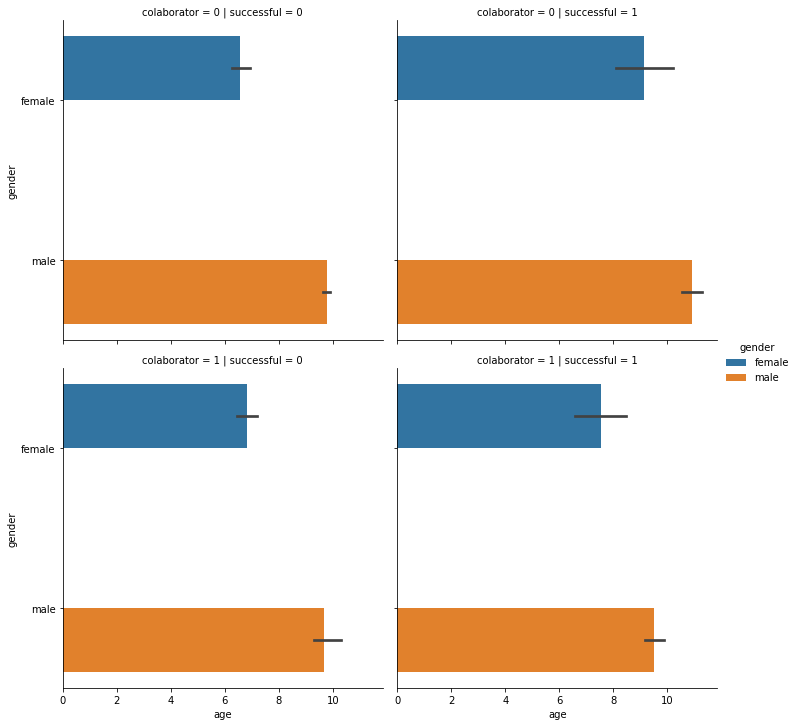

In [5]:
sns.catplot(y='gender', x='age', kind='bar', data=gb, hue='gender', col='successful', row='colaborator')

In [6]:
gb = colabs.groupby(['year', 'gender']).active.mean().reset_index()

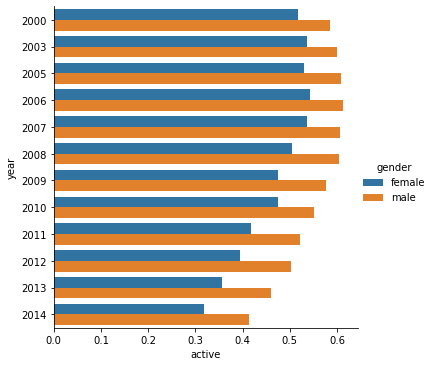

In [7]:
sns.catplot(y='year', x='active', kind='bar', data=gb, hue='gender')

## Let's control by people

Take two groups of females and males with similar age at each year to see if they stay or not.

Let's start with age 0 and 1 (early career researchers).

In [17]:
gb = colabs[(colabs.age.between(0, 3))].groupby(['year', 'gender', 'colaborator']).successful.mean().reset_index()

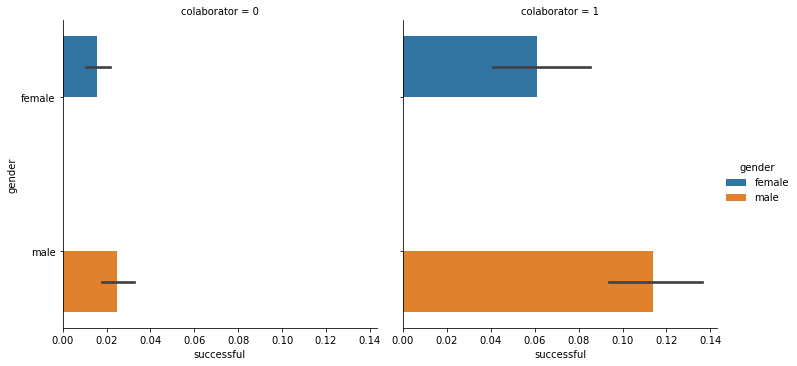

In [19]:
sns.catplot(y='gender', x='successful', hue='gender', col='colaborator', data=gb, kind='bar')

In [10]:
gb = colabs[colabs.age.between(4, 8) & (colabs.active == 1)].groupby(['year', 'gender', 'colaborator']).successful.mean().reset_index()

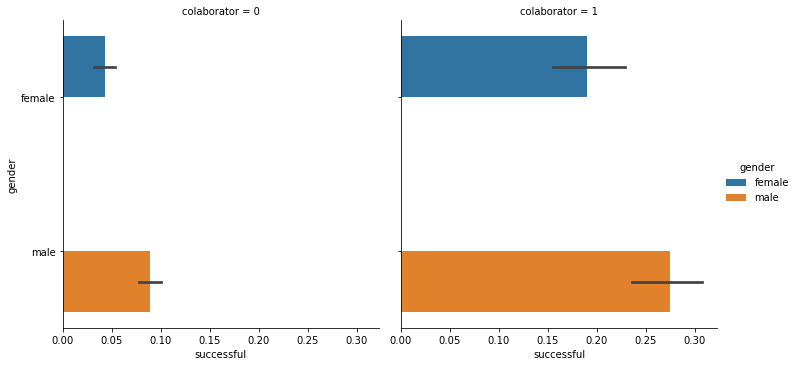

In [11]:
sns.catplot(y='gender', x='successful', hue='gender', col='colaborator', data=gb, kind='bar')

In [12]:
gb = colabs[colabs.age > 8].groupby(['year', 'gender', 'colaborator']).successful.mean().reset_index()

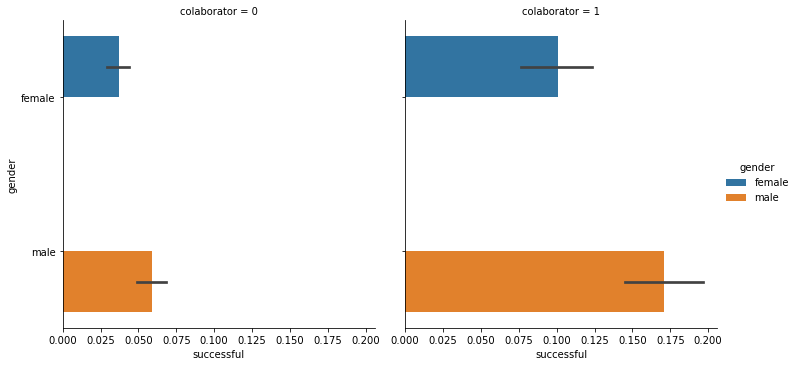

In [13]:
sns.catplot(y='gender', x='successful', hue='gender', col='colaborator', data=gb, kind='bar')

## Network parameters

In [14]:
df_melt = colabs.melt(id_vars=['author', 'year', 'colaborator',
                              'gender', 'successful', 'active', 'age'], value_vars=['nodes', 'edges', 'weight', 'clustering'])